# Towards User-Centered Active Learning Algorithms

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook
# sns.set_theme(style="white")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#K-means
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn import datasets

from sklearn import neighbors, datasets
from sklearn.manifold import TSNE

import random
from celluloid import Camera

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
n = [0,1,2,3,4,5,6,7,8,9]
x1 = [2, 2.5, 3, 3.5, 5, 5, 13, 14, 16, 17]
x2 = [3, 3, 2, 5, 4, 20, 16, 15, 15, 17]
labels = [0, 1, 0, 0, 1, 0, 0, 1 , 1, 0]
manual_labels = [-1, -1, -1, -1, -1, -1, -1, -1 , -1, -1]



i_n_samples = 150
del_X = make_blobs(n_samples=i_n_samples, centers=3, n_features=2,random_state=42)




n = range(0, i_n_samples+1)
x1 = list(np.concatenate(del_X[0][:,:1]))       
x2 = list(np.concatenate(del_X[0][:,1:2]))       

x1.append(30)
x2.append(30)

labels = np.random.randint(0,2, i_n_samples+1)
manual_labels = [-1] * (i_n_samples + 1)




# labels = ['x', 't', 'x', 'x', 't', 't', 'x', 't' , 't', 'x']
X = np.stack((n, x1, x2, labels, manual_labels), axis=1)
df = pd.DataFrame(X, columns=['sample_id', 'X1', 'X2', 'labels', 'manual_labels'])
df['sample_id'] = df['sample_id'].astype(int)

In [271]:
df

,sample_id,X1,X2,labels,manual_labels
0,0,-8.996611,-10.667228,0.0,-1.0
1,1,5.453396,0.742305,0.0,-1.0
2,2,-2.696987,9.231310,1.0,-1.0
3,3,6.042673,0.571319,0.0,-1.0
4,4,-5.985159,-5.478148,1.0,-1.0
...,...,...,...,...,...
95,95,-2.779966,9.258957,1.0,-1.0
96,96,-2.096798,9.386798,1.0,-1.0
97,97,4.478593,2.377221,1.0,-1.0
98,98,-4.171999,-4.245604,1.0,-1.0


In [274]:
t_del = list(df['sample_id'])

In [282]:
t_del[2:5]

[2, 3, 4]

In [291]:
df[df['sample_id'].isin(t_del[2:5])].loc[:,['X1', 'X2']]

,X1,X2
2,-2.696987,9.231310
3,6.042673,0.571319
4,-5.985159,-5.478148


In [275]:
t_del

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [4]:

# sns.set(rc={'figure.figsize':(6,6)})
# plot.set(xlim=(0, 18))
# plot.set(ylim=(0, 22))
# plot = sns.scatterplot(x="X1", y="X2", data=df, s=200, hue='labels')

## Building Blocks

In [5]:
def func_NSN(_df, _columns, _neighbors=5):
    
    NSN = NearestNeighbors(n_neighbors=_neighbors, algorithm='ball_tree')
    NSN.fit(_df[_columns])
    distances, indices = NSN.kneighbors()    
    return distances, indices

def func_B(x, Vt):
    # https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
    # Vt = labeled/trained feature vector 
    
    _min_dist = None
    
    for i in range(len(Vt)):         
        _d_temp = np.linalg.norm(x-Vt[i])
        
        #print(i, "   =  ", Vt[i])
        #print(_d_temp)
        #print("---------\n")
        
        if _min_dist == None:
            _min_dist = _d_temp 
        else:
            if _d_temp < _min_dist:
                _min_dist = _d_temp
            else:
                None
    
    return _min_dist
    
    
    
def func_SPB(Vc, Vt, index):
    
    # Vc = feature vector candidates
    # Vt = training Vector samples    
    
    _max_distance = None
    for i in range(len(Vc)):        
        _dist = func_B(x=Vc[i], Vt=Vt)
        
        if _max_distance is None:
            _max_distance = _dist
            candidate = i
        else:
            if _max_distance < _dist:
                _max_distance = _dist
                candidate = i
            else:
                None
                       

    candidate = index[candidate]
    #print(candidate)    
    return _max_distance, candidate


def func_CLU(Vc, columns):
    
    
    kmeans = KMeans(n_clusters=3, random_state=0).fit(Vc[columns].values)      
    
    Vc['kmeans_labels'] = None
    Vc['kmeans_labels'] = kmeans.labels_
    
    return Vc, kmeans.cluster_centers_
   
    
    
def func_DEN(df, columns, sample_id, k=5):
    
    #Vc = dataframe
    
    
    NSN = NearestNeighbors(n_neighbors=k, algorithm='ball_tree')
    NSN.fit(df[columns])
    distances, indices = NSN.kneighbors()
    
    _index = df[df['sample_id'] == sample_id].index[0]
    DEN = (distances[_index].sum() * distances[_index].sum() / len(distances[_index])) * - 1
    return DEN


def func_OUT(df, columns, sample_id, threshold, k=5):

        return func_DEN(df, columns, sample_id, k) * -1
    
    
# def func_CE(_df, _feature_columns, _predicated_class=True, k=None):
    
  


### Nearest Spatial Neighbors (NSN)

# DELETE

In [78]:
i_n_samples = 80
del_X = make_blobs(n_samples=i_n_samples, centers=5, n_features=3,random_state=42)

n = range(0, i_n_samples)
x1 = list(np.concatenate(del_X[0][:,:1]))       
x2 = list(np.concatenate(del_X[0][:,1:2]))       
x3 = list(np.concatenate(del_X[0][:,2:3]))       
labels = np.random.randint(0,5, i_n_samples)
manual_labels = [-1] * (i_n_samples )

X = np.stack((n, x1, x2, x3, labels, manual_labels), axis=1)
df = pd.DataFrame(X, columns=['sample_id', 'X1', 'X2', 'X3', 'labels', 'manual_labels'])
df['sample_id'] = df['sample_id'].astype(int)

In [79]:
df

,sample_id,X1,X2,X3,labels,manual_labels
0,0,-1.614865,9.769284,4.432713,1.0,-1.0
1,1,7.715051,-6.712226,-4.981496,2.0,-1.0
2,2,-3.024633,8.414032,5.587319,2.0,-1.0
3,3,8.209233,-5.624667,-5.813924,3.0,-1.0
4,4,-2.738648,9.403635,3.374760,0.0,-1.0
...,...,...,...,...,...,...
75,75,3.708989,-8.811260,10.443768,0.0,-1.0
76,76,-3.132675,7.506133,5.739526,1.0,-1.0
77,77,-3.080578,8.090203,2.027330,2.0,-1.0
78,78,-9.044194,5.883481,3.213027,0.0,-1.0


In [80]:
distances, indices = func_NSN(_df=df, _columns=['X1', 'X2', 'X3'], _neighbors=df.shape[0] - 1)

In [81]:
from mpl_toolkits.mplot3d import Axes3D

In [82]:
df.head()

,sample_id,X1,X2,X3,labels,manual_labels
0,0,-1.614865,9.769284,4.432713,1.0,-1.0
1,1,7.715051,-6.712226,-4.981496,2.0,-1.0
2,2,-3.024633,8.414032,5.587319,2.0,-1.0
3,3,8.209233,-5.624667,-5.813924,3.0,-1.0
4,4,-2.738648,9.403635,3.374760,0.0,-1.0


<IPython.core.display.Javascript object>


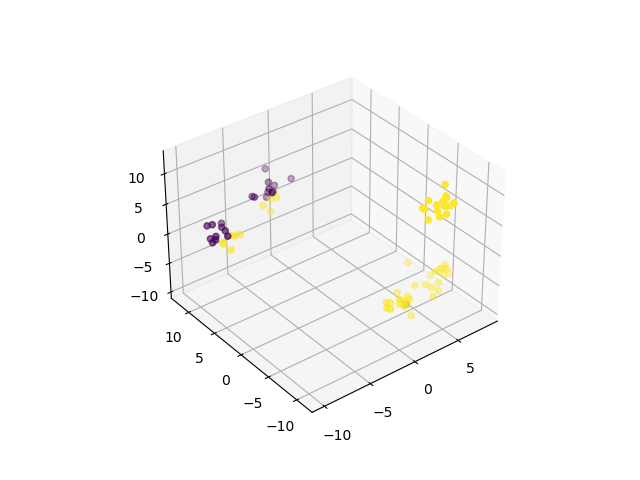

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
camera = Camera(fig) 

_sample_id = 30
df['manual_labels'][df['sample_id'] == _sample_id] = 0

for i in range(len(indices[_sample_id])):
    
    df['manual_labels'][df['sample_id'] == indices[_sample_id][i]] = 1        
    chart = ax.scatter(df['X1'], df['X2'], df['X3'], c=df['manual_labels'])
#     chart = ax.scatter(xs="X1", ys="X2", zs='X3', data=df, s=40, hue='manual_labels', legend=False, palette = {-1:'lightgrey', 0:'red', 1:'blue'})
#     chart = sns.scatterplot(x="X1", y="X2", z='X3', data=df, s=40, hue='manual_labels', legend=False, palette = {-1:'lightgrey', 0:'red', 1:'blue'})
    camera.snap()
    
animation = camera.animate(blit=False, interval=100)
animation.save('building_blocks_NSN_3d.gif')    

## FINISH

In [111]:
i_n_samples = 80
del_X = make_blobs(n_samples=i_n_samples, centers=2, n_features=2,random_state=42)

n = range(0, i_n_samples)
x1 = list(np.concatenate(del_X[0][:,:1]))       
x2 = list(np.concatenate(del_X[0][:,1:2]))       
labels = np.random.randint(0,2, i_n_samples)
manual_labels = [-1] * (i_n_samples )

X = np.stack((n, x1, x2, labels, manual_labels), axis=1)
df = pd.DataFrame(X, columns=['sample_id', 'X1', 'X2', 'labels', 'manual_labels'])
df['sample_id'] = df['sample_id'].astype(int)

In [112]:
df

,sample_id,X1,X2,labels,manual_labels
0,0,-3.109836,8.722592,0.0,-1.0
1,1,5.555281,2.301921,1.0,-1.0
2,2,-5.128943,9.836189,0.0,-1.0
3,3,6.526065,2.147747,1.0,-1.0
4,4,4.447518,2.274717,0.0,-1.0
...,...,...,...,...,...
75,75,-2.147562,8.369166,1.0,-1.0
76,76,-2.300334,7.054616,1.0,-1.0
77,77,3.856626,1.651108,1.0,-1.0
78,78,-3.522029,9.328533,0.0,-1.0


['X1', 'X2']

In [33]:
distances, indices = func_NSN(_df=df, _columns=['X1', 'X2'], _neighbors=df.shape[0] - 1)

In [34]:
df

,sample_id,X1,X2,labels,manual_labels
0,0,-3.109836,8.722592,0.0,-1.0
1,1,5.555281,2.301921,1.0,-1.0
2,2,-5.128943,9.836189,1.0,-1.0
3,3,6.526065,2.147747,0.0,-1.0
4,4,4.447518,2.274717,0.0,-1.0
...,...,...,...,...,...
75,75,-2.147562,8.369166,0.0,-1.0
76,76,-2.300334,7.054616,1.0,-1.0
77,77,3.856626,1.651108,1.0,-1.0
78,78,-3.522029,9.328533,1.0,-1.0


<IPython.core.display.Javascript object>


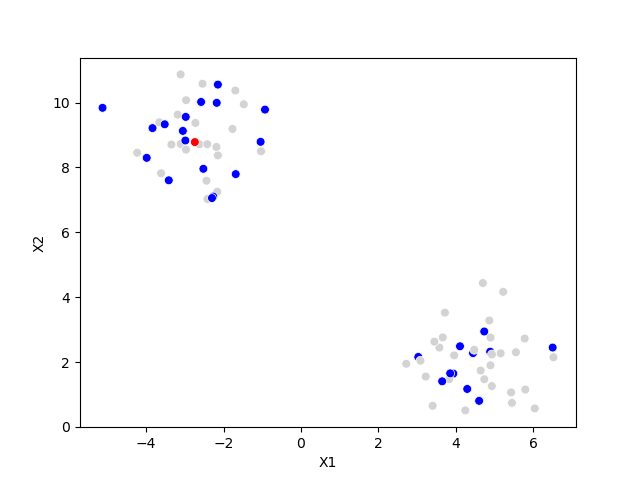

In [130]:
fig = plt.figure()
camera = Camera(fig) 

_sample_id = 15
df['manual_labels'][df['sample_id'] == _sample_id] = 0

for i in range(len(indices[_sample_id])):
    
    df['manual_labels'][df['sample_id'] == indices[_sample_id][i]] = 1        
    chart = sns.scatterplot(x="X1", y="X2", data=df, s=40, hue='manual_labels', legend=False, palette = {-1:'lightgrey', 0:'red', 1:'blue'})
    camera.snap()
    
animation = camera.animate(blit=False, interval=100)
animation.save('building_blocks_NSN.gif')    

### Spatial Balancing (SPB)

In [175]:
i_n_samples = 100
del_X = make_blobs(n_samples=i_n_samples, centers=2, n_features=2,random_state=42)
del_X = del_X[0][del_X[0][:,0].argsort()]

n = range(0, i_n_samples)
x1 = list(np.concatenate(del_X[:,:1]))       
x2 = list(np.concatenate(del_X[:,1:2]))  
labels = np.random.randint(0,2, i_n_samples)
manual_labels = [-1] * (i_n_samples )

X = np.stack((n, x1, x2, labels, manual_labels), axis=1)
df = pd.DataFrame(X, columns=['sample_id', 'X1', 'X2', 'labels', 'manual_labels'])
df['sample_id'] = df['sample_id'].astype(int)

In [176]:
df.loc[0:i_n_samples/2-1, 'labels'] = 0
df.loc[i_n_samples/2:(i_n_samples-1), 'labels'] = 1

<IPython.core.display.Javascript object>


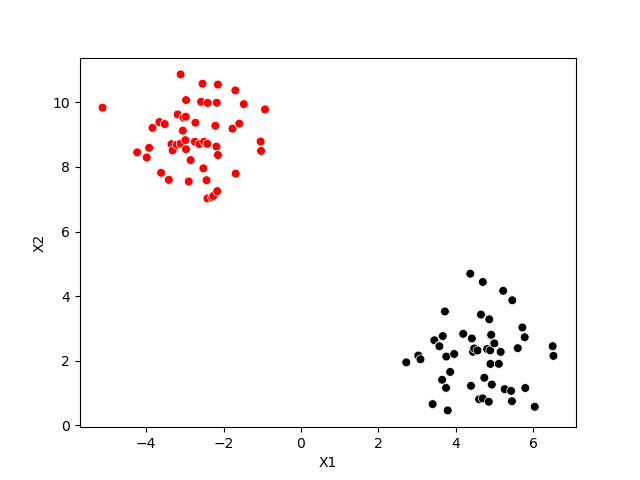

In [169]:
fig2 = plt.figure()
camera = Camera(fig2) 

_rand_sample = [random.randrange(*sorted([0,100])) for i in range(30)]
_rand_sample = list(set(_rand_sample))

Vc = df.loc[i_n_samples/2-1:(i_n_samples-1),:]
Vt = df.loc[0:i_n_samples/2-1,:]
Vt['manual_labels'] = Vt['labels']



# _sample_id = random.randrange(0,Vt.shape[0]-1)
# df['labels'][df['sample_id'] == _sample_id] = 2


for i in range(Vc.shape[0] - 1):   

    Vc = df[df['manual_labels'] == -1].reset_index(drop=True)
    Vt = df[df['manual_labels'] != -1].reset_index(drop=True)
    
    _max_dis, _can = func_SPB(Vc.iloc[:,1:3].values, Vt.iloc[:,1:3].values, index=Vc['sample_id'].values)     
    
    df['manual_lab
    sns.scatterplot(x="X1", y="X2", data=df, s=40, hue='manual_labels', legend=False,palette = {-1:'lightgrey', 0:'red', 1:'black'})
    camera.snap()
    
animation = camera.animate(blit=False, interval=700)
animation.save('building_blocks_SPB.gif')

In [170]:
_max_dis

0.0123540010924252

In [172]:
_can

55

In [173]:
Vc

,sample_id,X1,X2,labels,manual_labels
0,55,3.568986,2.455642,1.0,-1.0


In [174]:
Vt

,sample_id,X1,X2,labels,manual_labels
0,0,-5.128943,9.836189,0.0,0.0
1,1,-4.234115,8.451999,0.0,0.0
2,2,-3.987720,8.294442,0.0,0.0
3,3,-3.924568,8.593641,0.0,0.0
4,4,-3.837384,9.211147,0.0,0.0
...,...,...,...,...,...
94,95,5.782702,2.725103,1.0,1.0
95,96,5.798474,1.152487,1.0,1.0
96,97,6.042673,0.571319,1.0,1.0
97,98,6.505653,2.447003,1.0,1.0


### Density Estimation (DEN) 

In [236]:
i_n_samples = 100
del_X = make_blobs(n_samples=i_n_samples,  n_features=2,random_state=42, cluster_std=[0.4, 1, 2.5])

n = range(0, i_n_samples)
x1 = list(np.concatenate(del_X[0][:,:1]))       
x2 = list(np.concatenate(del_X[0][:,1:2]))       
labels = np.random.randint(0,2, i_n_samples)
manual_labels = [-1] * (i_n_samples )

X = np.stack((n, x1, x2, labels, manual_labels), axis=1)
df = pd.DataFrame(X, columns=['sample_id', 'X1', 'X2', 'labels', 'manual_labels'])
df['sample_id'] = df['sample_id'].astype(int)

In [237]:
df

,sample_id,X1,X2,labels,manual_labels
0,0,-8.996611,-10.667228,0.0,-1.0
1,1,5.453396,0.742305,0.0,-1.0
2,2,-2.696987,9.231310,1.0,-1.0
3,3,6.042673,0.571319,0.0,-1.0
4,4,-5.985159,-5.478148,1.0,-1.0
...,...,...,...,...,...
95,95,-2.779966,9.258957,1.0,-1.0
96,96,-2.096798,9.386798,1.0,-1.0
97,97,4.478593,2.377221,1.0,-1.0
98,98,-4.171999,-4.245604,1.0,-1.0


In [103]:
# for i in range(df.shape[0]):
#     print(func_DEN(df=df, columns=['X1','X2'], sample_id=i, k=5))

<IPython.core.display.Javascript object>


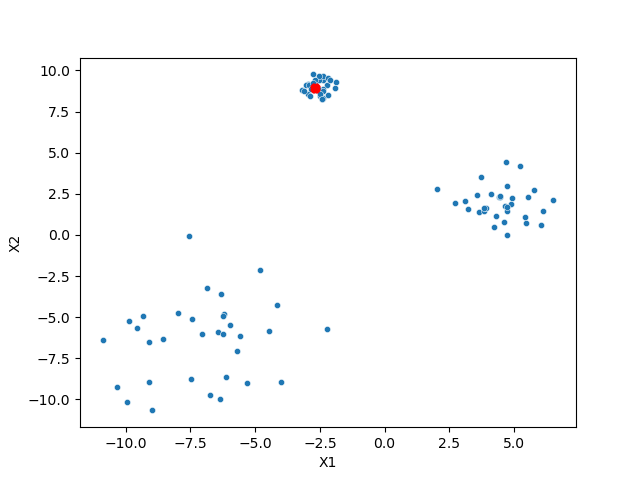

In [238]:
fig = plt.figure()
camera = Camera(fig) 

_max_DEN = None
_max_DEN_index = None
_list_sample_id = []
_list_DEN = []

for i in range(df.shape[0]):
    
    temp_id = df.loc[i,'sample_id']
    temp_DEN = func_DEN(df=df, columns=['X1','X2'], sample_id=temp_id, k=5)
    _list_sample_id.append(temp_id) 
    _list_DEN.append(temp_DEN)
    
    if _max_DEN == None:
        _max_DEN = temp_DEN
        _max_DEN_index = temp_id
        
    else:
        if _max_DEN < temp_DEN:
            _max_DEN = temp_DEN
            _max_DEN_index = temp_id
        

df['manual_labels'][df['sample_id'] == _max_DEN_index] = 1        

chart = sns.scatterplot(x="X1", y="X2", data=df, s=20, legend=False)
chart.scatter(x=df['X1'][df['sample_id'] == _max_DEN_index].values[0], y=df['X2'][df['sample_id'] == _max_DEN_index].values[0],marker = "X", s=20,linewidths = 3, zorder = 10, c=['red'])            
camera.snap()


animation = camera.animate(blit=False, interval=700)
animation.save('building_blocks_DEN.gif')

### Outlier Detection (OUT)

In [221]:
i_n_samples = 200
del_X = make_blobs(n_samples=i_n_samples,  n_features=2,random_state=42, cluster_std=[0.4, 1, 2.5])

n = range(0, i_n_samples)
x1 = list(np.concatenate(del_X[0][:,:1]))       
x2 = list(np.concatenate(del_X[0][:,1:2]))       
labels = np.random.randint(0,2, i_n_samples)
manual_labels = [-1] * (i_n_samples )

X = np.stack((n, x1, x2, labels, manual_labels), axis=1)
df = pd.DataFrame(X, columns=['sample_id', 'X1', 'X2', 'labels', 'manual_labels'])
df['sample_id'] = df['sample_id'].astype(int)

In [222]:
df

,sample_id,X1,X2,labels,manual_labels
0,0,6.505653,2.447003,0.0,-1.0
1,1,-3.557096,9.343047,1.0,-1.0
2,2,-6.910244,-9.123246,0.0,-1.0
3,3,-10.499838,-10.398769,0.0,-1.0
4,4,-8.353039,-4.756104,0.0,-1.0
...,...,...,...,...,...
195,195,-6.102358,-3.191719,1.0,-1.0
196,196,-1.754723,9.084117,0.0,-1.0
197,197,-1.877512,9.321260,1.0,-1.0
198,198,4.167947,3.062120,1.0,-1.0


<IPython.core.display.Javascript object>


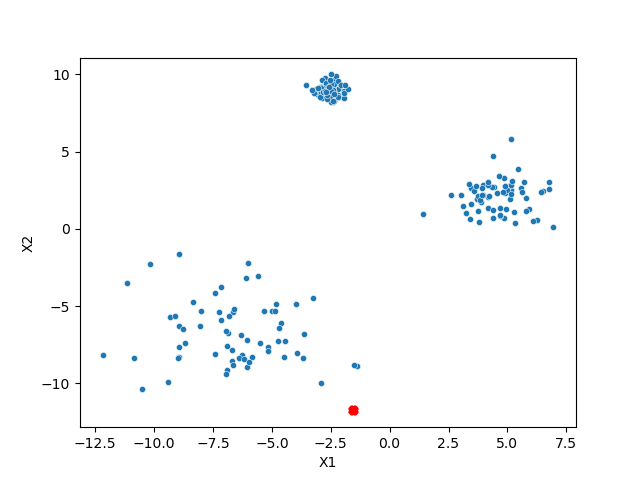

In [223]:
fig = plt.figure()
camera = Camera(fig) 

_max_DEN = None
_max_DEN_index = None
_list_sample_id = []
_list_DEN = []

for i in range(df.shape[0]):
    
    temp_id = df.loc[i,'sample_id']
    temp_DEN = func_OUT(df=df, columns=['X1','X2'], sample_id=temp_id, threshold=10, k=5)
    
    _list_sample_id.append(temp_id) 
    _list_DEN.append(temp_DEN)    
    
    if _max_DEN == None:
        _max_DEN = temp_DEN
        _max_DEN_index = temp_id
        
    else:
        if _max_DEN < temp_DEN:
            _max_DEN = temp_DEN
            _max_DEN_index = temp_id
        
df['manual_labels'][df['sample_id'] == _max_DEN_index] = 1        

chart = sns.scatterplot(x="X1", y="X2", data=df, s=20, legend=False)
chart.scatter(x=df['X1'][df['sample_id'] == _max_DEN_index].values[0], y=df['X2'][df['sample_id'] == _max_DEN_index].values[0],marker = "X", s=20,linewidths = 3, zorder = 10, c=['red'])            
camera.snap()


animation = camera.animate(blit=False, interval=700)
animation.save('building_blocks_OUT.gif')

### Compactness Estimation (CE) 

In [ ]:
func_CE(_df, _feature_columns, _predicated_class=True, k=None)

In [ ]:
  #df with a column called 'predicated_class' where a classifier is responsible to apply the predicitons
    
    _clusters = _df['predicated_class'].unique()

    _clusters = list(_df['predicated_class'].unique())
    _distance_series_list = []
    _score_CE_list = []

    for i in range(len(_clusters)):    
        _temp_df = _df[_df['predicated_class'] == _clusters[i]].reset_index(drop=True)

        _feature_columns = ['X1', 'X2']
        kmeans = KMeans(n_clusters=1).fit(_temp_df[_feature_columns])   

        _score_CE = 0
        _temp_df['dist'] = None

        _distance_series_list.append([])

        
        for ii in range(_temp_df.shape[0]):

            _a_sample = _temp_df[_feature_columns].iloc[ii,:].values
            _b_centroid = kmeans.cluster_centers_
            dist = np.linalg.norm(_a_sample-_b_centroid)

            _temp_df.loc[ii,'dist'] = dist
            dist = dist*dist
            _score_CE = _score_CE + dist


        _score_CE = _score_CE / df.shape[0] * 1.0
        _score_CE_list.append(_score_CE)
        _distance_series_list[i].append(_temp_df['dist'])
        _distance_series_list[i].append(_temp_df['sample_id'])        


    _list_d = []
    _list_sample_id = []
    for i in range(len(_distance_series_list)):

        _list_d.append(_distance_series_list[i][0])
        _list_sample_id.append(_distance_series_list[i][1])    


    _list_d = np.concatenate(_list_d)
    _list_sample_id = np.concatenate(_list_sample_id)


    _temp_df_2 = pd.DataFrame({'sample_id': _list_sample_id,'distance': _list_d})    
    _df = _df.merge(_temp_df_2, how='left')

    return _df, _score_CE_list, _clusters

In [258]:
i_model

0

In [257]:
_list_list_parameters[i_model][i_par]

IndexError: list index out of range

In [270]:

_list_databases = ['db1', 'db2']
_list_simulations = [
    ['sim 1'],
    ['sim 2']
]

_list_models = ['mod 1']
_list_parameters = [
    ['par 1', 'par 2']
]






for i_db in range(len(_list_databases)):
    for i_sim in range(len(_list_simulations[i_db])):
        for i_model in range(len(_list_models)):
            for i_par in range(len(_list_parameters[i_model])):
                print(_list_databases[i_db]),
                print(_list_simulations[i_db][i_sim]),
                print(_list_models[i_model]),
                print(_list_parameters[i_model][i_par]),
                print("---")
            print("--- ---")
        print("--- --- ---")
    print("--- --- --- ---")

db1
sim 1
mod 1
par 1
---
db1
sim 1
mod 1
par 2
---
--- ---
--- --- ---
--- --- --- ---
db2
sim 2
mod 1
par 1
---
db2
sim 2
mod 1
par 2
---
--- ---
--- --- ---
--- --- --- ---


In [268]:
_list_simulations

[['sim 1'], ['sim 2']]

In [264]:
i_par

1

In [266]:
_list_parameters[0]

['par 1']

In [246]:
i_sim

[8]

In [ ]:
# # EXAMPLE: 

# Vc = df[df['labels'] == 0].reset_index(drop=True).iloc[:,:2].values
# Vt = df[df['labels'] == 1].reset_index(drop=True).iloc[:,:2].values

# _max_dis, _can = func_SPB(Vc, Vt)
# Vc[_can]



###############   CLU


# Vc=df[df['manual_labels'] == -1].reset_index(drop=True)
# _CLU_return = func_CLU(Vc, columns=['X1', 'X2'])

# chart = sns.scatterplot(x="X1", y="X2", data=_CLU_return[0], s=40, hue='kmeans_labels', legend=False, 
#                 palette = {0:'lightgrey', 
#                            0.5:'darorange', 
#                            1:'lightblue', 
#                            1.5:'purple',
#                            2:'lightgreen',
#                            2.5:'peru'
#                           })

# chart.scatter(_CLU_return[1][:,0], _CLU_return[1][:,1],marker = "x", s=30,linewidths = 3, zorder = 10, c=['purple', 'purple','purple'])


# _max = None
# _max_i = None
# for i in range(df.shape[0]):
#     if _max == None:
#         _max = func_DEN(df, columns=['X1', 'X2'], sample_id=i, k =5)
#     else:
#         if func_DEN(df, columns=['X1', 'X2'], sample_id=i, k =5) > _max:
#             _max = func_DEN(df, columns=['X1', 'X2'], sample_id=i, k =5)
#             _max_i = i
            
# chart = sns.scatterplot(x="X1", y="X2", data=df, s=40, legend=False)
# chart.scatter(df.loc[_max_i,'X1'], df.loc[_max_i,'X2'],marker = "X", s=60,linewidths = 3, zorder = 10, c=['blue'])            




# _max = None
# _max_i = None
# for i in range(df.shape[0]):
#     if _max == None:
#         _max = func_OUT(df, columns=['X1', 'X2'], sample_id=i, threshold=10, k =5)
#     else:
#         if func_OUT(df, columns=['X1', 'X2'], sample_id=i, threshold=10, k =5) > _max:
#             _max = func_OUT(df, columns=['X1', 'X2'], sample_id=i, threshold=10,k =5)
#             _max_i = i
            
# chart = sns.scatterplot(x="X1", y="X2", data=df, s=40, legend=False)
# chart.scatter(df.loc[_max_i,'X1'], df.loc[_max_i,'X2'],marker = "X", s=30,linewidths = 3, zorder = 10, c=['black'])            

## User Strategy

In [ ]:
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# y = iris.target

### 1. Equal Spread
Users prefer to label instances in unlabeled areas,
i.e., far away from other labeled instances, to distribute labels uniformly across the data.

In [ ]:
# import some data to play with
dict_target_names = {0:'setosa', 1:'vericolor', 2:'virginica'}
iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target


n = range(0, len(X))
_data = np.stack((n, X[:,0], X[:,1], X[:,2], X[:,3], y), axis=1)
df = pd.DataFrame(_data, columns=['sample_id', 'X1', 'X2', 'X3', 'X4', 'labels'])
df['manual_labels'] = -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2', 'X3', 'X4']], df['labels'], test_size=0.70, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.90, random_state=1)


print("Train = ", X_train.shape[0])
print("Test = ", X_test.shape[0])
print("Validation = ", X_val.shape[0])


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']], df['labels'], test_size=0.90, random_state=0)
df['manual_labels'][df['sample_id'].isin(list(X_train.index.values))] = df['labels'][df['sample_id'].isin(list(X_train.index.values))]

#classificador:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

_list_performance = []
_list_performance.append(logreg.score(X_val, y_val))
_candidate_list = []

for i in range(X_test.shape[0]):
    
    Vc = df[~df.index.isin(list(X_train.index.values))]
    Vt = df[df.index.isin(list(X_train.index.values))]
    
    _max_dis, _can = func_SPB(Vc=Vc[['X1', 'X2', 'X3', 'X4']].values , Vt=Vt[['X1', 'X2', 'X3', 'X4']].values, index=Vc['sample_id'].values)     
    _candidate_list.append(_can)
#     print(_can)
        
    X_train = X_train.append(df[['X1', 'X2', 'X3', 'X4']][df['sample_id'] == _can])
#     df['manual_labels'][df['sample_id'] == _can] = df['labels'][df['sample_id'] == _can] * 1.0
    y_train = y_train.append(pd.Series(df['labels'][df['sample_id'] == _can].values[0], index=[_can]))
    

    logreg.fit(X_train, y_train)
    
    X_test = X_test[~X_test.index.isin(X_train.index)]
    y_test = y_test[~y_test.index.isin(X_train.index)]
    _list_performance.append(logreg.score(X_val, y_val))


Plot 2D w/ TSN-E

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=15)
points = tsne.fit_transform(df[['X1', 'X2', 'X3', 'X4']].values)

In [ ]:
fig3 = plt.figure()
plt.scatter(x=points[:, 0], y=points[:, 1],s=70, c=df['labels'])
plt.title('Iris Dataset w/ TSN-e', fontsize=20, y=1.03)

In [ ]:
df['sample_id'].values

In [ ]:
X = np.stack((df['sample_id'].values, points[:,0], points[:,1], df['labels'].values, df['manual_labels'].values), axis=1)
df_tsne = pd.DataFrame(X, columns=['sample_id', 'X1', 'X2', 'labels', 'manual_labels'])
df_tsne['sample_id'] = df_tsne['sample_id'].astype(int)
df_tsne['manual_labels'] = - 1

In [ ]:
df_tsne

In [ ]:
fig2 = plt.figure()
camera = Camera(fig2) 

df_tsne['manual_labels'] = -1
for i in range(len(_candidate_list)):   

    
    _can = _candidate_list[i]
    
    df_tsne['manual_labels'][df_tsne['sample_id'] == _can] = 1
    sns.scatterplot(x="X1", y="X2", data=df_tsne, s=40, hue='manual_labels', legend=False,palette = {-1:'lightgrey', 0:'red', 1:'blue'})
    camera.snap()
    
animation = camera.animate(blit=False, interval=100)
animation.save('strategy_equal_spread.gif')

### 2. Dense Areas First
Users prefer to label instances located in dense regions in the feature space. In contrast to centroidbased strategies instances do not have to be at the center of a dense region

In [ ]:
# 50% DEN & 50% SPB
# identify dense regions 

In [ ]:
# import some data to play with
dict_target_names = {0:'setosa', 1:'vericolor', 2:'virginica'}
iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target


n = range(0, len(X))
_data = np.stack((n, X[:,0], X[:,1], X[:,2], X[:,3], y), axis=1)
df = pd.DataFrame(_data, columns=['sample_id', 'X1', 'X2', 'X3', 'X4', 'labels'])
df['manual_labels'] = -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2', 'X3', 'X4']], df['labels'], test_size=0.70, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.90, random_state=1)


X_test['sample_id'] = list(X_test.index.values)
X_train['sample_id'] = list(X_train.index.values)
X_val['sample_id'] = list(X_val.index.values)

# y_test['sample_id'] = list(y_test.index.values)
# y_train['sample_id'] = list(y_train.index.values)
# y_val['sample_id'] = list(y_val.index.values)

X_test = X_test.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_val = y_val.reset_index(drop=True)


print("Train = ", X_train.shape[0])
print("Test = ", X_test.shape[0])
print("Validation = ", X_val.shape[0])

In [ ]:
df['manual_labels'][df['sample_id'].isin(list(X_train['sample_id'].values))] = df['labels'][df['sample_id'].isin(list(X_train['sample_id'].values))]
_feature_columns = ['X1', 'X2', 'X3', 'X4']
_feature_columns_sample_id = ['X1', 'X2', 'X3', 'X4','sample_id']
_label_column = 'label'

#classificador:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train[_feature_columns], y_train)

_list_performance = []

_list_performance.append(logreg.score(X_val[_feature_columns], y_val))
_candidate_list = []


for i in range(X_test.shape[0]):

    Vc = df[~df.index.isin(list(X_train['sample_id'].values))]
    Vt = df[df.index.isin(list(X_train['sample_id'].values))]
    
    Vc = Vc.reset_index(drop=True)
    Vt = Vt.reset_index(drop=True)
        
    #SPB:    
    if i%2 == 0:
        _max_dis, _can = func_SPB(Vc=Vc[_feature_columns].values , Vt=Vt[_feature_columns].values, index=Vc['sample_id'].values)     
        _candidate_list.append(_can)

        X_train = X_train.append(df[_feature_columns_sample_id][df['sample_id'] == _can])
        y_train = y_train.append(pd.Series(df['labels'][df['sample_id'] == _can].values[0], index=[_can]))


        logreg.fit(X_train[_feature_columns], y_train)

        X_test = X_test[_feature_columns_sample_id][~X_test.index.isin(X_train.index)]
        y_test = y_test[~y_test.index.isin(y_train.index)]
        _list_performance.append(logreg.score(X_val[_feature_columns], y_val))
        
    #DEN:
    else:
        
        X_test = X_test.reset_index(drop=True)
        
        _den_max = None
        for ii in range(X_test.shape[0]):                                        
            if _den_max == None:                
                _den_max = func_DEN(df=Vc, columns=['X1', 'X2', 'X3', 'X4'], sample_id=X_test.loc[ii, 'sample_id'])            
                _can = X_test.loc[ii, 'sample_id']
            else:
                if _den_max < func_DEN(df=Vc, columns=['X1', 'X2', 'X3', 'X4'], sample_id=X_test.loc[ii, 'sample_id']):
                    _den_max = func_DEN(df=Vc, columns=['X1', 'X2', 'X3', 'X4'], sample_id=X_test.loc[ii, 'sample_id'])
                    _can = X_test.loc[ii, 'sample_id']
                else:
                    None
                    
        _candidate_list.append(_can)

In [ ]:
# fig2 = plt.figure()
# camera = Camera(fig2) 

# _rand_sample = [random.randrange(*sorted([0,100])) for i in range(30)]
# _rand_sample = list(set(_rand_sample))

# Vc = df.loc[i_n_samples/2-1:(i_n_samples-1),:]
# Vt = df.loc[0:i_n_samples/2-1,:]
# Vt['manual_labels'] = Vt['labels']



# # _sample_id = random.randrange(0,Vt.shape[0]-1)
# # df['labels'][df['sample_id'] == _sample_id] = 2



# for i in range(Vc.shape[0] - 1):   

#     Vc = df[df['manual_labels'] == -1].reset_index(drop=True)
#     Vt = df[df['manual_labels'] != -1].reset_index(drop=True)
    
#     _max_dis, _can = func_SPB(Vc.iloc[:,1:3].values, Vt.iloc[:,1:3].values, index=Vc['sample_id'].values)     
    
#     df['manual_labels'][df['sample_id'] == _can] = 1
#     sns.scatterplot(x="X1", y="X2", data=df, s=40, hue='manual_labels', legend=False,palette = {-1:'lightgrey', 0:'red', 1:'black'})
#     camera.snap()
    
# animation = camera.animate(blit=False, interval=700)
# animation.save('building_blocks_SPB.gif')

In [ ]:
# cold_freeze_index = list(np.random.randint(0,df.shape[0], 10))
# df['manual_labels'][df['sample_id'].isin(cold_freeze_index)] = df['labels'][df['sample_id'].isin(cold_freeze_index)]

# X_train = df[['X1', 'X2']][df['manual_labels'] == -1]
# y_train = df[['manual_labels']][df['manual_labels'] == -1]

# X_test = df[['X1', 'X2']][df['manual_labels'] != -1]
# y_test = df[['manual_labels']][df['manual_labels'] != -1]
